# **Programming Project Statistics**


# **Matthew Benvenuto (Team member)**
# **Raja Agireddy (Team member)**
# **Ketan Patel (Team member)**

# **Part 1 Meet the data**

# **Data description** – This data includes four columns/random variables: the daily ETF return; the daily relative change in the price of the crude oil; the daily relative change in the gold price; and the daily return of the JPMorgan Chase & Co stock. The sample size is 1000. 

Mounting google collab to my drive to import the data set!

Import statements that are useful throughout the code

In [191]:
import math 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats 
import scipy.stats as  stats2
import statsmodels.stats.weightstats as sw 
import statsmodels.api as sm 
import warnings 
warnings.filterwarnings("ignore")


Creating a pandas data frame labeled **dataframe**

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
dataframe = pd.read_excel('/content/drive/MyDrive/StatsProjectData/MA 541 Course Project Data.xlsx') 
#dataframe = pd.read_excel('/content/drive/MyDrive/MA 541 Course Project Data.xlsx') 
dataframe.head() 

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


Quickly making two dictionarys to hold the mean and std called: **mean_dictionary** and **std_dictionary**

In [194]:
mean_dictionary = {}
std_dictionary = {}
for feature in dataframe.columns[:]:
  mean_dictionary["Mean_{0}".format(feature)] = dataframe[feature].mean()
  std_dictionary["Std_{0}".format(feature)] = dataframe[feature].std()

In [195]:
info = dataframe.info()
description = dataframe.describe() 
print("The information: \n", info)
print("--------------------------------------------\n", description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close_ETF  1000 non-null   float64
 1   oil        1000 non-null   float64
 2   gold       1000 non-null   float64
 3   JPM        1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB
The information: 
 None
--------------------------------------------
          Close_ETF          oil         gold          JPM
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    121.152960     0.001030     0.000663     0.000530
std      12.569790     0.021093     0.011289     0.011017
min      96.419998    -0.116533    -0.065805    -0.048217
25%     112.580002    -0.012461    -0.004816    -0.005538
50%     120.150002     0.001243     0.001030     0.000386
75%     128.687497     0.014278     0.007482     0.006966
max     152.619995     0.087726     0.042199     0.057480


Printing the mean and the std dictionarys

In [196]:
print("The mean: \n", mean_dictionary)
print("------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("The standard deviation: \n", std_dictionary)

The mean: 
 {'Mean_Close_ETF': 121.152960012, 'Mean_oil': 0.0010300354937470017, 'Mean_gold': 0.0006628360819999999, 'Mean_JPM': 0.0005304110210000001}
------------------------------------------------------------------------------------------------------------------------------------------------

The standard deviation: 
 {'Std_Close_ETF': 12.569790313110744, 'Std_oil': 0.021092898551005313, 'Std_gold': 0.011289060259316142, 'Std_JPM': 0.011016562382593569}


# **Part 2**

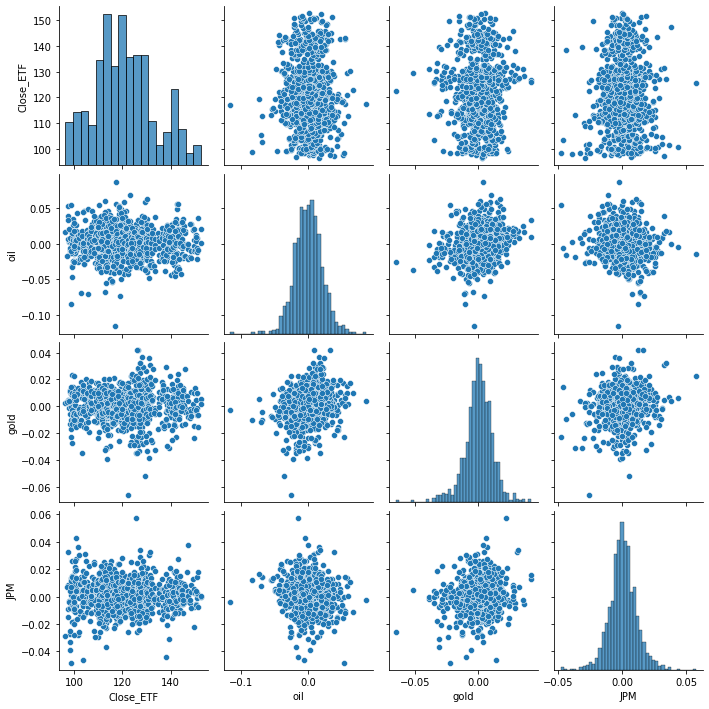

In [197]:
sns.pairplot(dataframe)

In [198]:
import matplotlib.pyplot as plt

The histograms of the Data Sets

Text(0.5, 1.0, 'JPM Histogram')

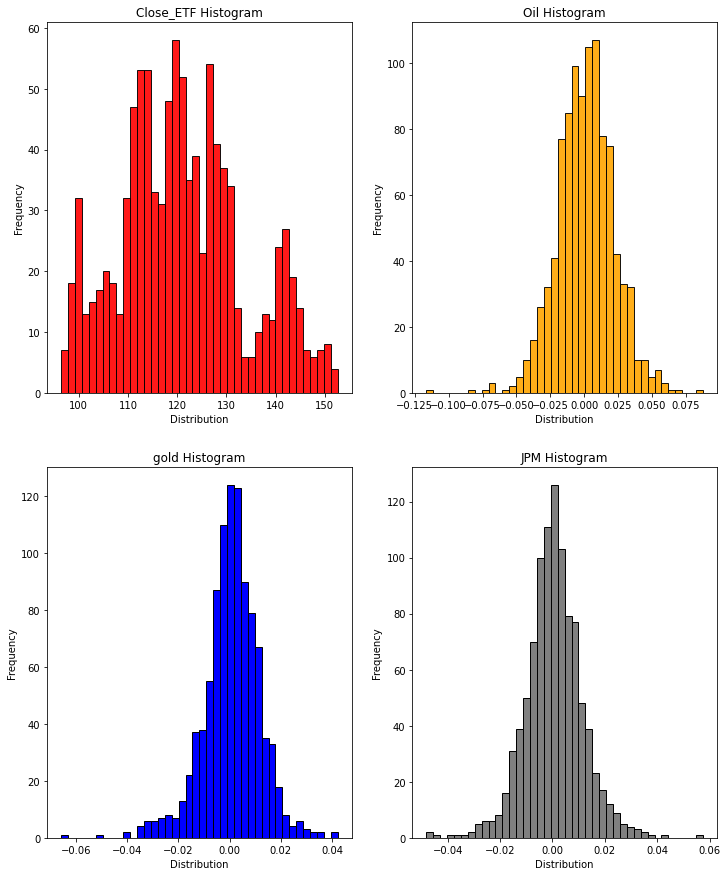

In [199]:
plt.figure(figsize = [12, 15]) 
plt.subplot(2,2,1)
plt.hist(dataframe['Close_ETF'], color='r',alpha=.9, bins = 40, edgecolor="black")
plt.xlabel('Distribution')
plt.ylabel('Frequency')
plt.title("Close_ETF Histogram")

plt.subplot(2,2,2)
plt.hist(dataframe['oil'], color='orange',alpha=.9, bins = 40, edgecolor="black")
plt.xlabel('Distribution')
plt.ylabel('Frequency')
plt.title("Oil Histogram")

plt.subplot(2,2,3)
plt.hist(dataframe['gold'], color='blue', bins = 40, edgecolor="black")
plt.xlabel('Distribution')
plt.ylabel('Frequency')
plt.title("gold Histogram")

plt.subplot(2,2,4)
plt.hist(dataframe['JPM'], color='grey', bins = 40, edgecolor="black")
plt.xlabel('Distribution')
plt.ylabel('Frequency')
plt.title("JPM Histogram")

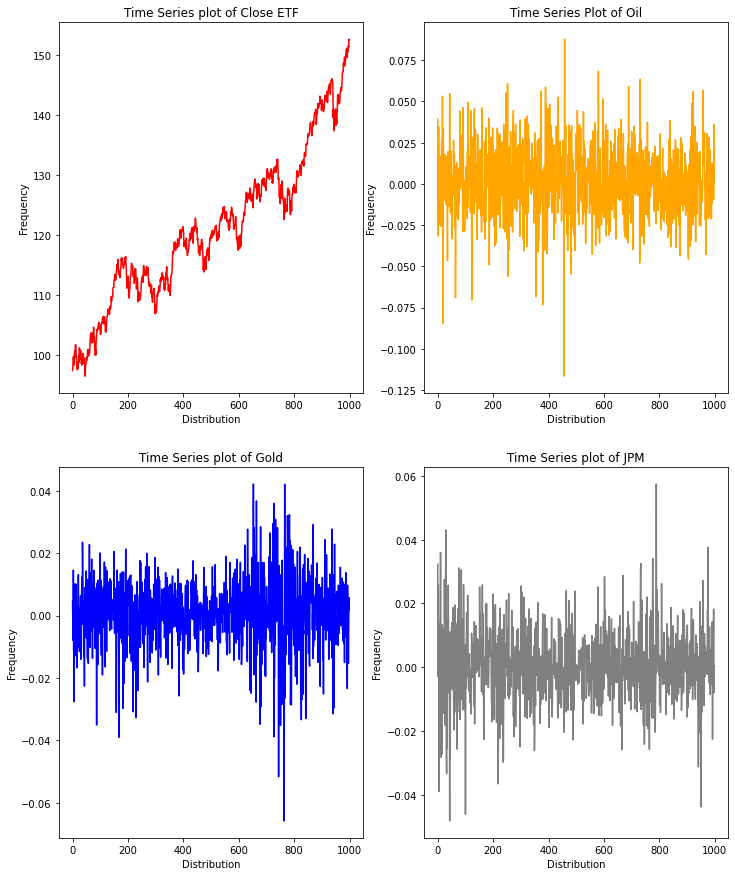

In [200]:
colors = ["r","orange","blue","grey"]
titles = ["Time Series plot of Close ETF","Time Series Plot of Oil","Time Series plot of Gold","Time Series plot of JPM"]
index = 0 # indication we are using the first sample

plt.figure(figsize = [12, 15]) 
for i in range(len(colors)):
  plt.subplot(2,2,i+1)
  plt.plot(dataframe[dataframe.columns[i]], color=colors[i])
  plt.xlabel('Distribution')
  plt.ylabel('Frequency')
  plt.title(titles[i])

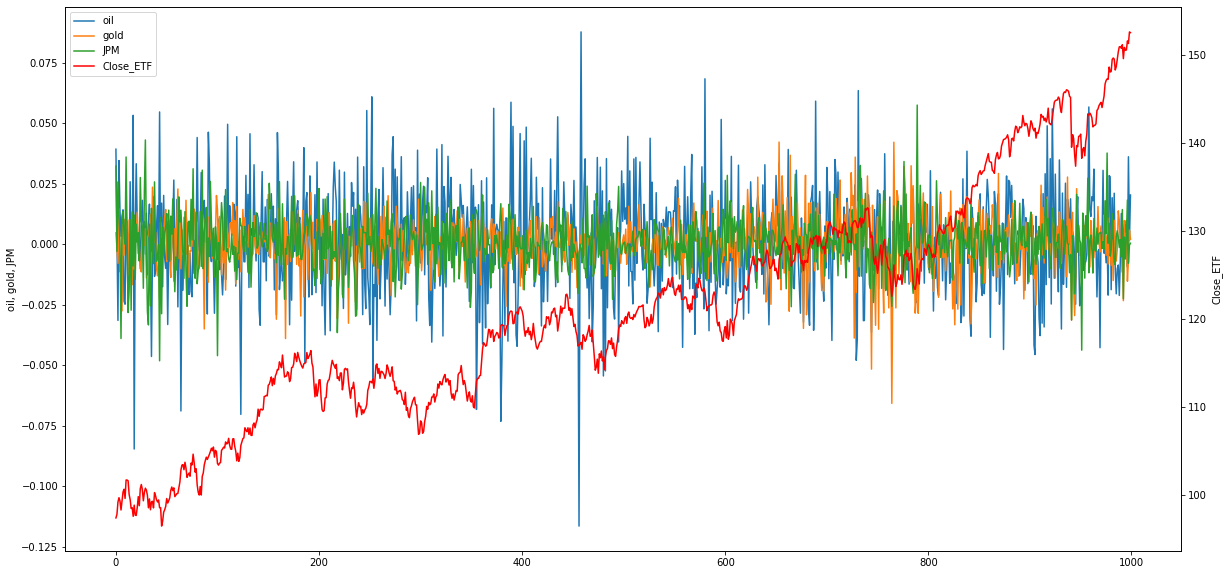

In [201]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
lns1 = ax1.plot(dataframe['oil'], label='oil')
lns2 = ax1.plot(dataframe['gold'], label='gold')
lns3 = ax1.plot(dataframe['JPM'], label='JPM')
lns4 = ax2.plot(dataframe['Close_ETF'], color='r', label='Close_ETF')
ax1.set_ylabel('oil, gold, JPM')
ax2.set_ylabel('Close_ETF')
fig.legend(loc=2, bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.show()

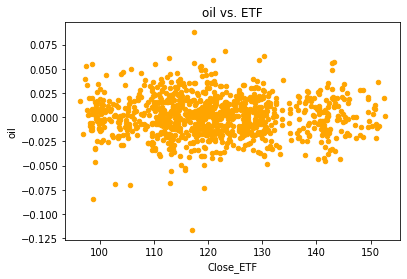

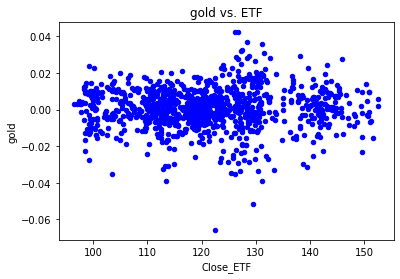

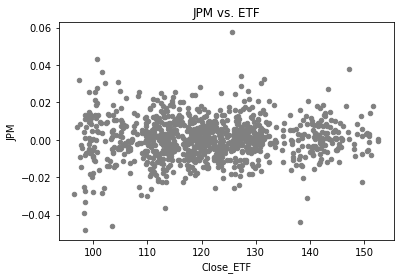

In [202]:
# 4) Three scatter plots to describe the relationships between the ETF column and the OIL column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively
dataframe.plot.scatter(x='Close_ETF', y='oil', color = 'orange',title='oil vs. ETF')
dataframe.plot.scatter(x='Close_ETF', y='gold', color='blue', title='gold vs. ETF')
dataframe.plot.scatter(x='Close_ETF', y='JPM', color='grey', title='JPM vs. ETF')

# **Part 3 What distribution does your data follow**

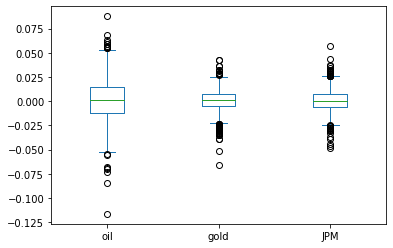

In [203]:
my_data = dataframe
my_data = my_data.drop(columns=['Close_ETF'])
my_data.head()
my_data.plot(kind = 'box')

 **Taking a look into the oil distribution**

H0 : Oil follows a normal distribution

H1 : Oil does not follow a normal distribution

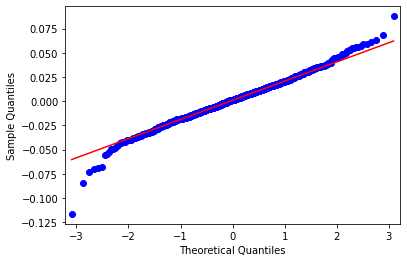

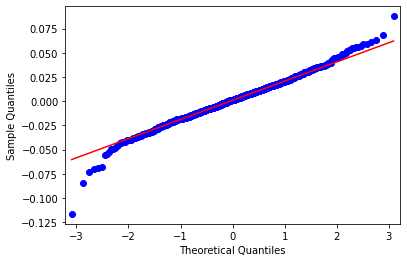

In [204]:
sm.qqplot(dataframe["oil"],line = "q")

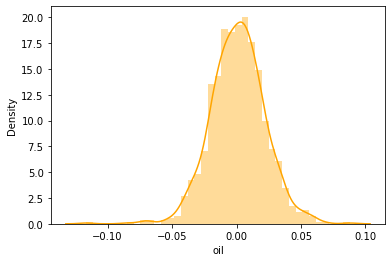

In [205]:
sns.distplot(dataframe["oil"],color="orange")

In [206]:
stats.normaltest(dataframe["oil"])

NormaltestResult(statistic=41.4478074658443, pvalue=9.993623074366447e-10)

oil follows a normal distribution

 **Taking a look into the Gold distribution**

H0 : Gold follows a normal distribution

H1 : Gold does not follow a normal distribution

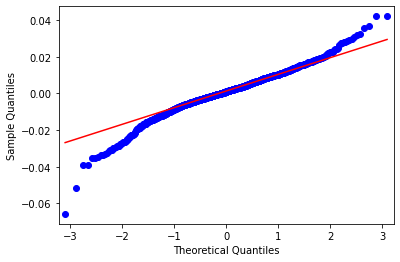

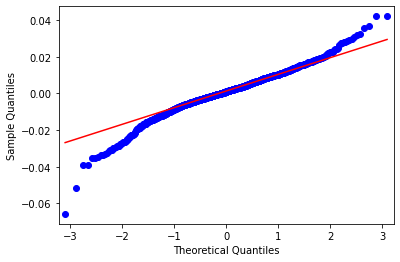

In [207]:
sm.qqplot(dataframe["gold"],line = "q")

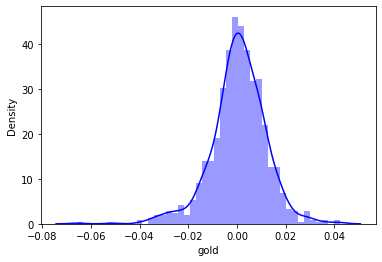

In [208]:
sns.distplot(dataframe["gold"],color="blue")

In [209]:
stats.normaltest(dataframe["gold"])

NormaltestResult(statistic=105.7598369986937, pvalue=1.0827873971023125e-23)

 gold follows a normal distribution

 **Taking a look into the JPM distribution**

H0 : JPM follows a normal distribution

H1 : JPM does not follow a normal distribution





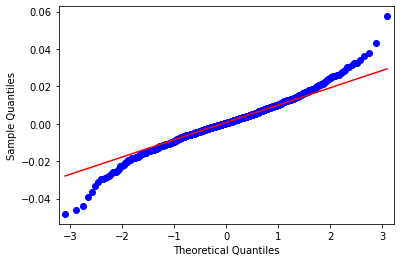

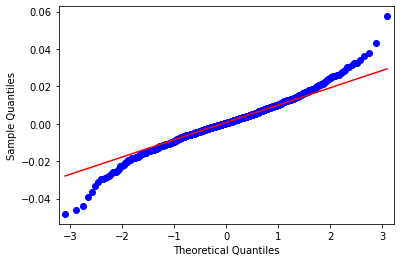

In [210]:
sm.qqplot(dataframe["JPM"],line = "q")

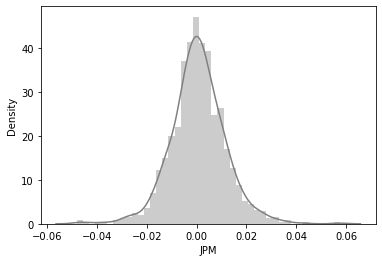

In [211]:
sns.distplot(dataframe["JPM"],color="grey")

In [212]:
stats.normaltest(dataframe["JPM"])

NormaltestResult(statistic=52.29823459337726, pvalue=4.4013170216572694e-12)

jpm follows a normal distribution

 **Taking a look into the Close_ETF distribution**

H0 : ETF follows a normal distribution

H1 : ETF does not follow a normal distribution

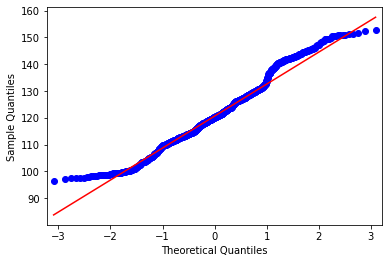

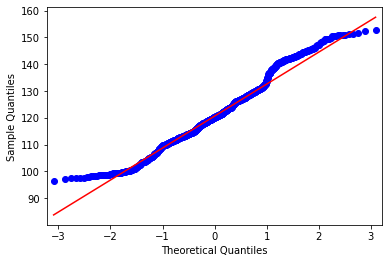

In [213]:
sm.qqplot(dataframe["Close_ETF"],line = "q")

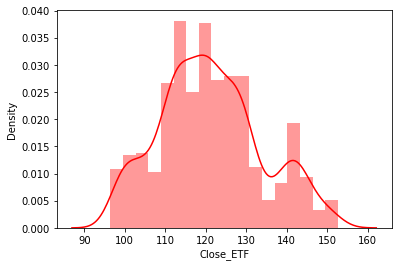

In [214]:
sns.distplot(dataframe["Close_ETF"],color="r")

In [215]:
stats.normaltest(dataframe["Close_ETF"])

NormaltestResult(statistic=27.147577721224625, pvalue=1.2734397418438873e-06)

close_etf follows a normal distribution

# **Part 4 Break your data into small groups and let them discuss the importance of the Central Limit Theorem**

**The mean and standard deviation of the overall data features.**

In [216]:
print("The mean: \n", mean_dictionary)
print("------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("The standard deviation: \n", std_dictionary)

The mean: 
 {'Mean_Close_ETF': 121.152960012, 'Mean_oil': 0.0010300354937470017, 'Mean_gold': 0.0006628360819999999, 'Mean_JPM': 0.0005304110210000001}
------------------------------------------------------------------------------------------------------------------------------------------------

The standard deviation: 
 {'Std_Close_ETF': 12.569790313110744, 'Std_oil': 0.021092898551005313, 'Std_gold': 0.011289060259316142, 'Std_JPM': 0.011016562382593569}


**Function that can split the dataframe into chunks**

In [217]:
# input - df: a Dataframe, chunkSize: the chunk size
# output - a list of DataFrame
# purpose - splits the DataFrame into smaller chunks
def split_dataframe(df, chunk_size = 20): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

# **Splitting the data into 50 samples**

In [218]:
df_split_50 = np.array_split(dataframe, 50)

In [219]:
print("There are {} samples of the data in the df_split_50 datframe".format(len(df_split_50)))

There are 50 samples of the data in the df_split_50 datframe


**Displaying the *first data sample*, index 0 of the df_split, for all of the data features**

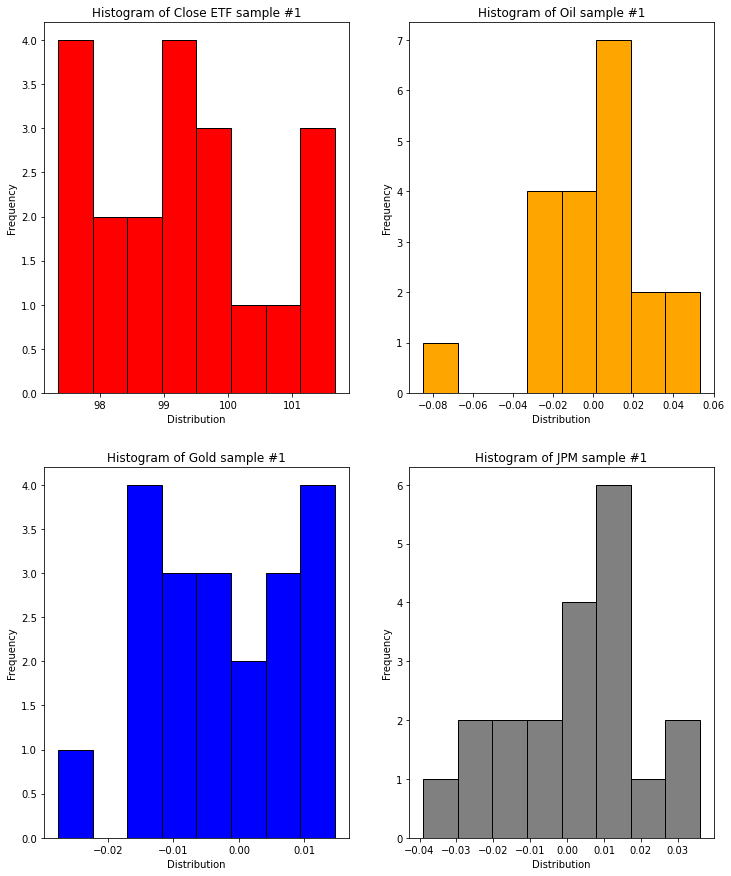

In [220]:
colors = ["r","orange","blue","grey"]
bar_graph_titles = ["Histogram of Close ETF sample #{}","Histogram of Oil sample #{}","Histogram of Gold sample #{}","Histogram of JPM sample #{}"]
sample = 0   # <----- indication we are using the first sample, out of 50 possible samples, each containing 20 datapoints

plt.figure(figsize = [12, 15]) 
for i in range(len(colors)):
  plt.subplot(2,2,i+1)
  plt.hist(df_split_50[index][dataframe.columns[i]], color=colors[i], bins = 8, edgecolor="black")
  plt.xlabel('Distribution')
  plt.ylabel('Frequency')
  plt.title(bar_graph_titles[i].format(sample+1))

*Some arrays of mean data across all of the samples*

In [221]:
each_sample_mean_gold = []
each_sample_mean_oil = []
each_sample_mean_jpm = []
each_sample_mean_close_etf = []
for i in range(len(df_split_50)):
  each_sample_mean_gold.append(df_split_50[i]["gold"].mean())
  each_sample_mean_oil.append(df_split_50[i]["oil"].mean())
  each_sample_mean_jpm.append(df_split_50[i]["JPM"].mean())
  each_sample_mean_close_etf.append(df_split_50[i]["Close_ETF"].mean())

In [222]:
for i in range(len(df_split_50)):
  print("Sample {} mean of gold is {}".format(i+1,each_sample_mean_gold[i]))
  print("Sample {} mean of oil is {}".format(i+1,each_sample_mean_oil[i]))
  print("Sample {} mean of jpm is {}".format(i+1,each_sample_mean_jpm[i]))
  print("Sample {} mean of close_etf is {}".format(i+1,each_sample_mean_close_etf[i]))
  print("-------------------------------------------------------------------------")

Sample 1 mean of gold is -0.0026730609499999993
Sample 1 mean of oil is -0.00020167967855099362
Sample 1 mean of jpm is 0.0017469389499999999
Sample 1 mean of close_etf is 99.32100080000001
-------------------------------------------------------------------------
Sample 2 mean of gold is 0.0027824251000000003
Sample 2 mean of oil is 0.001488658081438945
Sample 2 mean of jpm is 0.0024722308
Sample 2 mean of close_etf is 99.55399974999999
-------------------------------------------------------------------------
Sample 3 mean of gold is -0.00042659499999999994
Sample 3 mean of oil is 0.0025244357227256166
Sample 3 mean of jpm is -0.0024038215999999998
Sample 3 mean of close_etf is 99.15400055
-------------------------------------------------------------------------
Sample 4 mean of gold is 0.0032804053
Sample 4 mean of oil is -0.007378625009986017
Sample 4 mean of jpm is 0.0025693594500000006
Sample 4 mean of close_etf is 102.5505004
-------------------------------------------------------

**Plotting the total sample means for each feature**



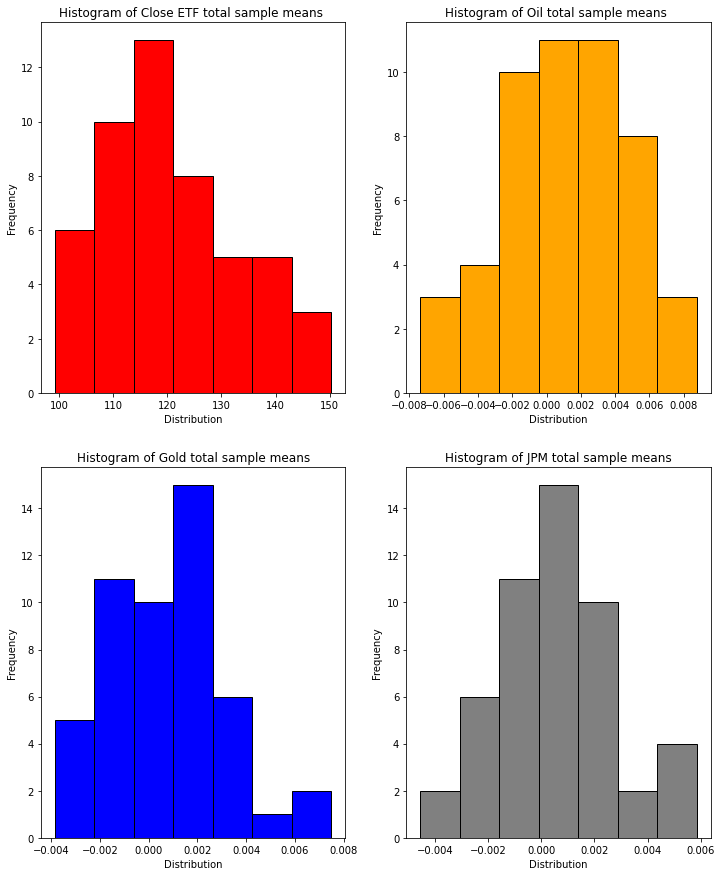

In [223]:
colors = ["r","orange","blue","grey"]
total_histogram_each_feature_50_samples = [each_sample_mean_close_etf, each_sample_mean_oil, each_sample_mean_gold ,each_sample_mean_jpm]
bar_graph_titles = ["Histogram of Close ETF total sample means ","Histogram of Oil total sample means ","Histogram of Gold total sample means","Histogram of JPM total sample means" ]
sample = 0   # <----- indication we are using the first sample, out of 50 possible samples, each containing 20 datapoints

plt.figure(figsize = [12, 15]) 
for i in range(len(colors)):
  plt.subplot(2,2,i+1)
  plt.hist(total_histogram_each_feature_50_samples[i], color=colors[i], bins = 7, edgecolor="black")
  plt.xlabel('Distribution')
  plt.ylabel('Frequency')
  plt.title(bar_graph_titles[i].format(sample+1))

**Investigating the distribution of the total sample pool across the features**

**The null hypothesis being tested in each graph**

**CLOSE_ETF**

H0 : total sample mean for close_etf follows a normal distribution

H1 :  total sample mean for close_etf does not follow a normal distribution

**Oil**

H0 : total sample mean for oil follows a normal distribution

H1 :  total sample mean for oil does not follow a normal distribution

**Gold**

H0 : total sample mean for gold follows a normal distribution

H1 :  total sample mean for gold does not follow a normal distribution

**JPM**

H0 : total sample mean for jpm follows a normal distribution

H1 :  total sample mean for jpm does not follow a normal distribution

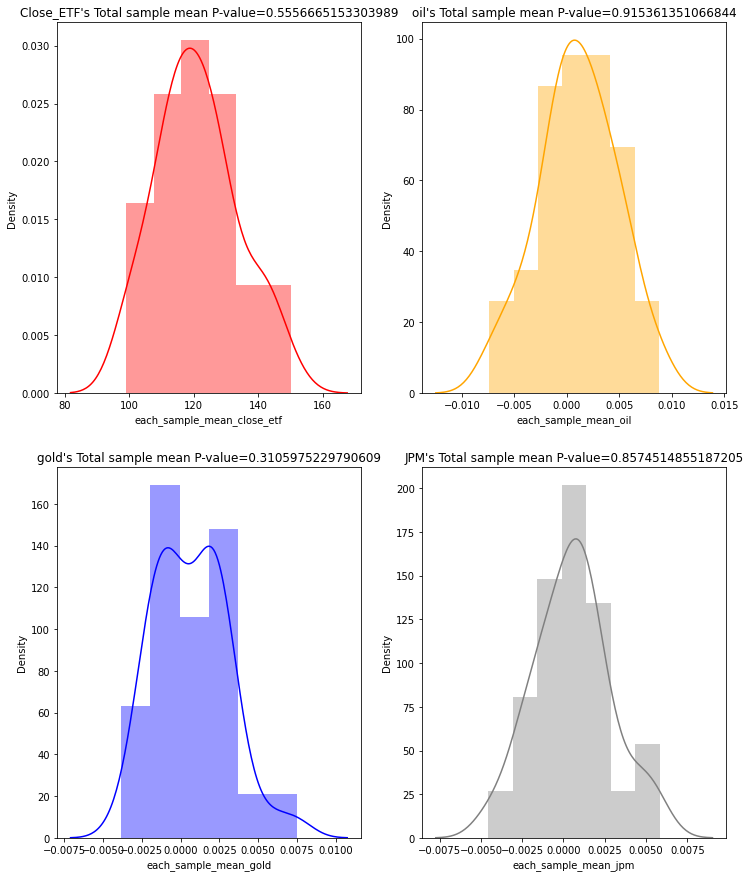

In [224]:
sample = 0   # <----- indication we are using the first sample, out of 50 possible samples, each containing 20 datapoints
column_names = ["each_sample_mean_close_etf", "each_sample_mean_oil", "each_sample_mean_gold" ,"each_sample_mean_jpm"]
df1 = pd.DataFrame(np.array(total_histogram_each_feature_50_samples).T, columns = ["each_sample_mean_close_etf", "each_sample_mean_oil", "each_sample_mean_gold" ,"each_sample_mean_jpm"])

plt.figure(figsize = [12, 15]) 
for i in range(len(colors)):
  plt.subplot(2,2,i+1)
  sns.distplot(df1[column_names[i]],color=colors[i]).set(title="{}'s Total sample mean P-value={}".format(dataframe.columns[i],stats.normaltest(df1[column_names[i]])[1]))

**The p-value and the graphs both indicate that the total sample mean across each of the features are not following a normal distribution.**

Still need to do the mean and std part 1, 2 etc.

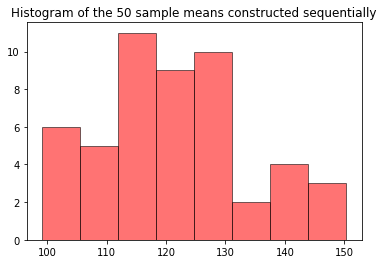

In [283]:
close_etf = dataframe[['Close_ETF']]
splicing = []
for i in np.arange(1,51):
 num = [i]*20
 splicing.extend(num)
splicing = np.array(splicing)
close_etf['spliced'] = splicing.tolist()
spliced_means = close_etf.groupby('spliced')['Close_ETF'].mean()

plt.hist(x = spliced_means, edgecolor='black', bins=8, color= 'r',alpha=.55);
plt.title(f'Histogram of the 50 sample means constructed sequentially');

[Text(0.5, 1.0, 'Histogram of the 50 sample means constructed sequentially')]

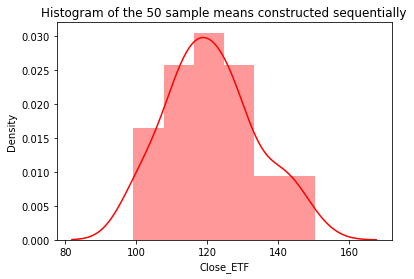

In [284]:
sns.distplot(spliced_means,color='r').set(title="Histogram of the 50 sample means constructed sequentially")

In [282]:
mu_xbar = np.mean(spliced_means)
sigma_xbar = np.std(spliced_means)
print("\u03BC xbar:\n",mu_xbar)
print("\u03C3 xbar:\n",sigma_xbar)
print("\u03BC x:\n", mean_dictionary['Mean_Close_ETF'])
print("\u03C3 x / sqrt(n):\n", std_dictionary['Std_Close_ETF']/(20**0.5))

μ xbar:
 121.15296001199998
σ xbar:
 12.489175897769007
μ x:
 121.152960012
σ x / sqrt(n):
 2.810690560303399


# **Spliting the data into 10 samples**

In [226]:
df_split_10 = np.array_split(dataframe, 10)

In [227]:
print("There are {} samples of the data in the df_split_10 datframe".format(len(df_split_10)))

There are 10 samples of the data in the df_split_10 datframe


**Displaying the *first data sample*, index 0 of the df_split, for all of the data features**

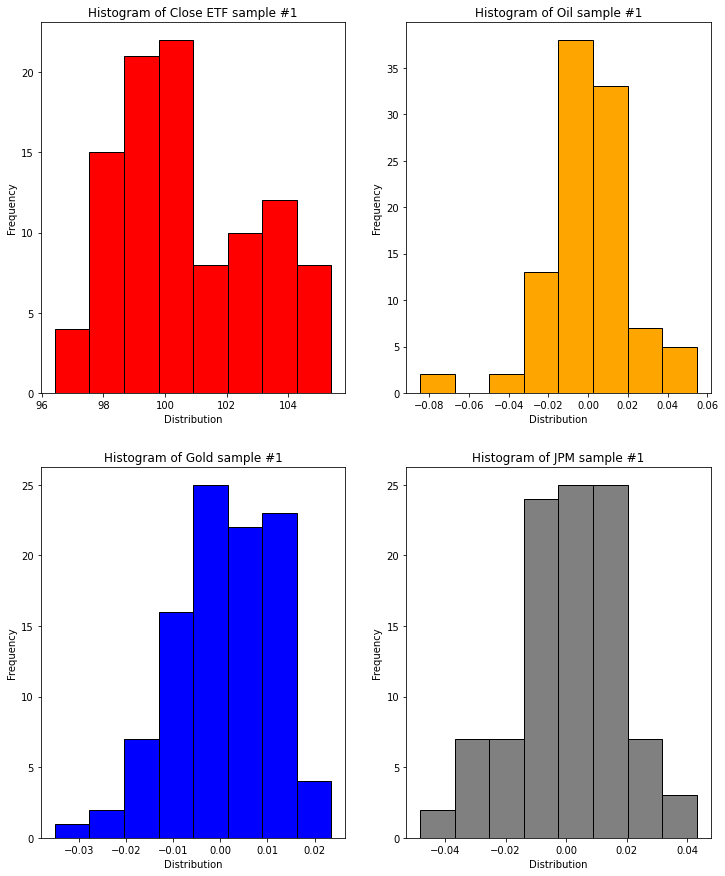

In [228]:
colors = ["r","orange","blue","grey"]
bar_graph_titles = ["Histogram of Close ETF sample #{}","Histogram of Oil sample #{}","Histogram of Gold sample #{}","Histogram of JPM sample #{}"]
sample = 0   # <----- indication we are using the first sample, out of 50 possible samples, each containing 20 datapoints

plt.figure(figsize = [12, 15]) 
for i in range(len(colors)):
  plt.subplot(2,2,i+1)
  plt.hist(df_split_10[index][dataframe.columns[i]], color=colors[i], bins = 8, edgecolor="black")
  plt.xlabel('Distribution')
  plt.ylabel('Frequency')
  plt.title(bar_graph_titles[i].format(sample+1))

In [229]:
each_sample_mean_gold = []
each_sample_mean_oil = []
each_sample_mean_jpm = []
each_sample_mean_close_etf = []
for i in range(len(df_split_10)):
  each_sample_mean_gold.append(df_split_10[i]["gold"].mean())
  each_sample_mean_oil.append(df_split_10[i]["oil"].mean())
  each_sample_mean_jpm.append(df_split_10[i]["JPM"].mean())
  each_sample_mean_close_etf.append(df_split_10[i]["Close_ETF"].mean())

In [230]:
for i in range(len(df_split_10)):
  print("Sample {} mean of gold is {}".format(i+1,each_sample_mean_gold[i]))
  print("Sample {} mean of oil is {}".format(i+1,each_sample_mean_oil[i]))
  print("Sample {} mean of jpm is {}".format(i+1,each_sample_mean_jpm[i]))
  print("Sample {} mean of close_etf is {}".format(i+1,each_sample_mean_close_etf[i]))
  print("-------------------------------------------------------------------------")

Sample 1 mean of gold is 0.0004965470700000002
Sample 1 mean of oil is 0.00044556518987993695
Sample 1 mean of jpm is 0.0012322001500000004
Sample 1 mean of close_etf is 100.77430028999999
-------------------------------------------------------------------------
Sample 2 mean of gold is 0.0006010111000000001
Sample 2 mean of oil is 0.002340437300188188
Sample 2 mean of jpm is 0.00125149267
Sample 2 mean of close_etf is 110.48050028
-------------------------------------------------------------------------
Sample 3 mean of gold is 9.802810000000211e-06
Sample 3 mean of oil is 0.0020765151029551437
Sample 3 mean of jpm is -0.0012927327299999997
Sample 3 mean of close_etf is 112.01809938999999
-------------------------------------------------------------------------
Sample 4 mean of gold is 0.0009101207699999998
Sample 4 mean of oil is -3.8065369899651384e-05
Sample 4 mean of jpm is 0.0008532794400000001
Sample 4 mean of close_etf is 114.51720014
-------------------------------------------

**Plotting the total sample means for each feature**

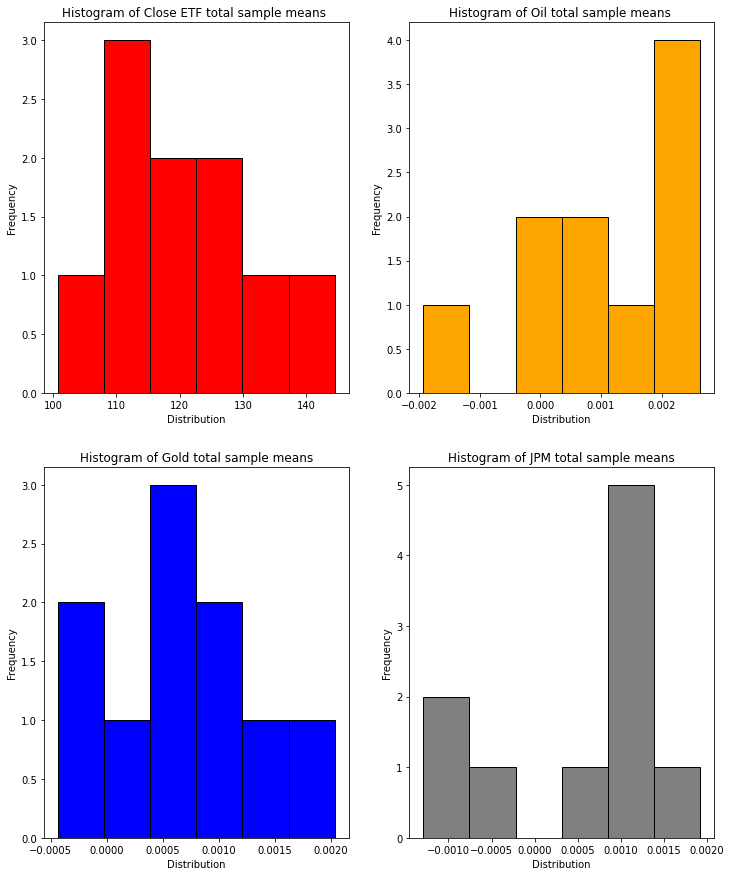

In [231]:
colors = ["r","orange","blue","grey"]
total_histogram_each_feature_10_samples = [each_sample_mean_close_etf, each_sample_mean_oil, each_sample_mean_gold ,each_sample_mean_jpm]
bar_graph_titles = ["Histogram of Close ETF total sample means ","Histogram of Oil total sample means ","Histogram of Gold total sample means","Histogram of JPM total sample means" ]
sample = 0   # <----- indication we are using the first sample, out of 50 possible samples, each containing 20 datapoints

plt.figure(figsize = [12, 15]) 
for i in range(len(colors)):
  plt.subplot(2,2,i+1)
  plt.hist(total_histogram_each_feature_10_samples[i], color=colors[i], bins = 6, edgecolor="black")
  plt.xlabel('Distribution')
  plt.ylabel('Frequency')
  plt.title(bar_graph_titles[i].format(sample+1))

**Investigating the distribution of the total sample pool across the features**

**The null hypothesis being tested in each graph**

**CLOSE_ETF**

H0 : total sample mean for close_etf follows a normal distribution

H1 :  total sample mean for close_etf does not follow a normal distribution

**Oil**

H0 : total sample mean for oil follows a normal distribution

H1 :  total sample mean for oil does not follow a normal distribution

**Gold**

H0 : total sample mean for gold follows a normal distribution

H1 :  total sample mean for gold does not follow a normal distribution

**JPM**

H0 : total sample mean for jpm follows a normal distribution

H1 :  total sample mean for jpm does not follow a normal distribution

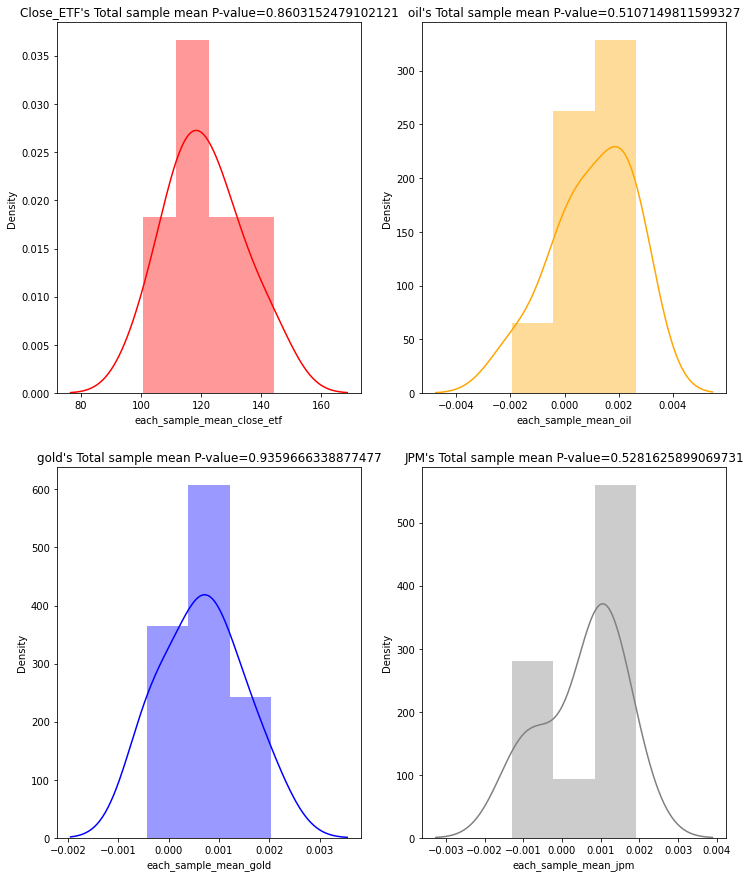

In [232]:
sample = 0   # <----- indication we are using the first sample, out of 50 possible samples, each containing 20 datapoints
column_names = ["each_sample_mean_close_etf", "each_sample_mean_oil", "each_sample_mean_gold" ,"each_sample_mean_jpm"]
df1 = pd.DataFrame(np.array(total_histogram_each_feature_10_samples).T, columns = ["each_sample_mean_close_etf", "each_sample_mean_oil", "each_sample_mean_gold" ,"each_sample_mean_jpm"])

plt.figure(figsize = [12, 15]) 
for i in range(len(colors)):
  plt.subplot(2,2,i+1)
  sns.distplot(df1[column_names[i]],color=colors[i]).set(title="{}'s Total sample mean P-value={}".format(dataframe.columns[i],stats.normaltest(df1[column_names[i]])[1]))

Again the conclussion for the 10 samples mean' distribution does not follow a normal distribution for each and every feature based on p-value and the sketch above!

In [285]:
close_etf = dataframe[['Close_ETF']]
splicing = []
for i in np.arange(1,101):
 num = [i]*10
 splicing.extend(num)
splicing = np.array(splicing)
close_etf['spliced'] = splicing.tolist()
spliced_means = close_etf.groupby('spliced')['Close_ETF'].mean()

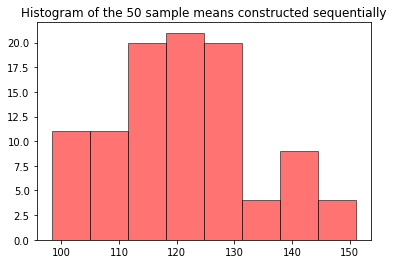

In [286]:
plt.hist(x = spliced_means, edgecolor='black', bins=8, color= 'r',alpha=.55);
plt.title(f'Histogram of the 50 sample means constructed sequentially');

[Text(0.5, 1.0, 'Histogram of the 50 sample means constructed sequentially')]

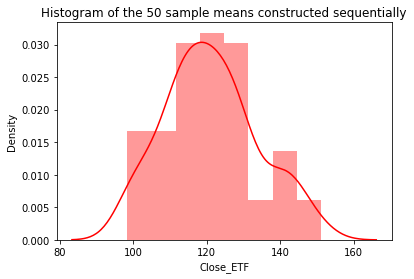

In [287]:
sns.distplot(spliced_means,color='r').set(title="Histogram of the 50 sample means constructed sequentially")

In [289]:
mu_xbar = np.mean(spliced_means)
sigma_xbar = np.std(spliced_means)
print("\u03BC xbar:\n",mu_xbar)
print("\u03C3 xbar:\n",sigma_xbar)
print("\u03BC x:\n", mean_dictionary['Mean_Close_ETF'])
print("\u03C3 x / sqrt(n):\n", std_dictionary['Std_Close_ETF']/(10**0.5))

μ xbar:
 121.15296001200001
σ xbar:
 12.52200531277574
μ x:
 121.152960012
σ x / sqrt(n):
 3.9749167100151


Not enough samples, does not normally follow the Central Limit Thereom, need more samples then a mere 10 samples. 

# **Generate 50 simple random samples with replacement with just ETF now**

In [233]:
etf = dataframe[['Close_ETF']]
bootstrap_means_20_50 = []
bootstrap_stds_20_50 = []
for _ in range(50):
 bootstrap_means_20_50.append(etf.sample(20, replace = True).Close_ETF.mean())
 bootstrap_stds_20_50.append(etf.sample(20, replace = True).Close_ETF.std())

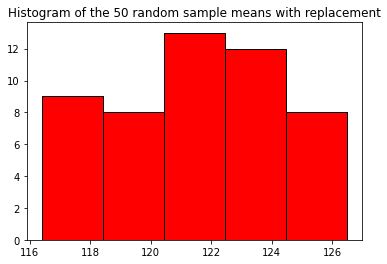


The distance between μ xbar and μ x= 0.3736402060000046
The distance between σ xbar and σ x= 0.09661683497613316


In [234]:
plt.hist(x = bootstrap_means_20_50, edgecolor='black', bins=5, color="r");
plt.title(f'Histogram of the 50 random sample means with replacement');
plt.show()
mu_xbar_20_50 = np.mean(bootstrap_means_20_50)
sigma_xbar_20_50 = np.std(bootstrap_means_20_50)

print("\nThe distance between \u03BC xbar and \u03BC x= {}".format(abs(mu_xbar_20_50-mean_dictionary['Mean_Close_ETF'])))
print("The distance between \u03C3 xbar and \u03C3 x= {}".format(abs(sigma_xbar_20_50- std_dictionary['Std_Close_ETF']/(20**0.5))))

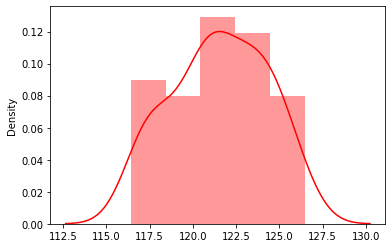

In [235]:
sns.distplot( bootstrap_means_20_50,color="r")

In [236]:
print("\u03BC xbar:\n",mu_xbar_20_50)
print("\u03C3 xbar:\n",sigma_xbar_20_50)
print("\u03BC x:\n", mean_dictionary['Mean_Close_ETF'])
print("\u03C3 x / sqrt(n):\n", std_dictionary['Std_Close_ETF']/(20**0.5))

μ xbar:
 121.526600218
σ xbar:
 2.7140737253272658
μ x:
 121.152960012
σ x / sqrt(n):
 2.810690560303399


The results are approximately following the central limit theroeom, as the samples are random, the overall structure is approcximately normal distribution

# **Generate 10 simple random samples with replacement with just ETF now**

In [237]:
etf = dataframe[['Close_ETF']]
bootstrap_means_100_10 = []
bootstrap_stds_100_10 = []
for _ in range(10):
 bootstrap_means_100_10.append(etf.sample(100, replace = True).Close_ETF.mean())
 bootstrap_stds_100_10.append(etf.sample(100, replace = True).Close_ETF.std())

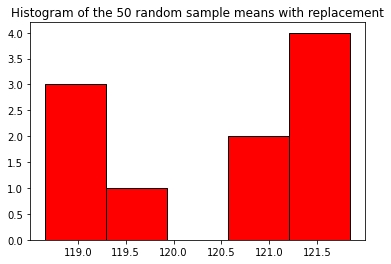


The distance between μ xbar and μ x= 0.6668602299999691
The distance between σ xbar and σ x= 0.0769134945820047


In [238]:
plt.hist(x = bootstrap_means_100_10, edgecolor='black', bins=5, color="r");
plt.title(f'Histogram of the 50 random sample means with replacement');
plt.show()
mu_xbar_100_10 = np.mean(bootstrap_means_100_10)
sigma_xbar_100_10 = np.std(bootstrap_means_100_10)

print("\nThe distance between \u03BC xbar and \u03BC x= {}".format(abs(mu_xbar_100_10-mean_dictionary['Mean_Close_ETF'])))
print("The distance between \u03C3 xbar and \u03C3 x= {}".format(abs(sigma_xbar_100_10- std_dictionary['Std_Close_ETF']/(100**0.5))))

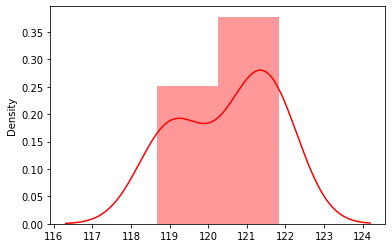

In [239]:
sns.distplot( bootstrap_means_100_10,color="r")

In [240]:
print("\u03BC xbar:\n",mu_xbar_100_10)
print("\u03C3 xbar:\n",sigma_xbar_100_10)
print("\u03BC x:\n", mean_dictionary['Mean_Close_ETF'])
print("\u03C3 x / sqrt(n):\n", std_dictionary['Std_Close_ETF']/(100**0.5))

μ xbar:
 120.48609978200003
σ xbar:
 1.1800655367290698
μ x:
 121.152960012
σ x / sqrt(n):
 1.2569790313110745


The sample size were large enough, but we did not randomly select enough samples to approximately get a normal distribution. We would need more random samples to improve the central limit thereom artificat for preserving an approximately normal distribution

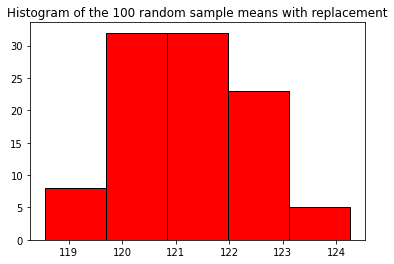


The distance between μ xbar and μ x= 0.06589804949997813
The distance between σ xbar and σ x= 0.057509686326241205


In [241]:
bootstrap_means = []
for _ in range(100):
 bootstrap_means.append(etf.sample(100, replace = True).Close_ETF.mean())
plt.hist(x = bootstrap_means, edgecolor='black', bins=5,color='r')
plt.title(f'Histogram of the 100 random sample means with replacement')
plt.show()
mu_xbar = np.mean(bootstrap_means)
sigma_xbar = np.std(bootstrap_means)


print("\nThe distance between \u03BC xbar and \u03BC x= {}".format(abs(mu_xbar-mean_dictionary['Mean_Close_ETF'])))
print("The distance between \u03C3 xbar and \u03C3 x= {}".format(abs(sigma_xbar- std_dictionary['Std_Close_ETF']/(100**0.5))))

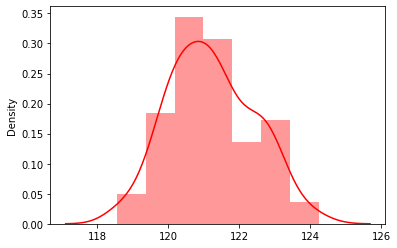

In [242]:
sns.distplot( bootstrap_means,color="r")

In [243]:
print("\u03BC xbar:\n",mu_xbar)
print("\u03C3 xbar:\n",sigma_xbar)
print("\u03BC x:\n", mean_dictionary['Mean_Close_ETF'])
print("\u03C3 x / sqrt(n):\n", std_dictionary['Std_Close_ETF']/(100**0.5))

μ xbar:
 121.21885806149997
σ xbar:
 1.1994693449848333
μ x:
 121.152960012
σ x / sqrt(n):
 1.2569790313110745


This is a much better represntation of the dataset and it flows nicely towards a normally distributed data set. These results are consistent with the central limit thereom. 

# **Part 5: Construct a confidence interval with your data**

In [244]:
#  95% CI using one of the 10 SRS with size 100 for mu 
margin_error_100 =    1.96*std_dictionary['Std_Close_ETF']/(100**0.5)
xbar_100 =    bootstrap_means_100_10[5]
lower_100, upper_100 =    (xbar_100 -    margin_error_100, xbar_100 +    margin_error_100) 
print("95% CI for \u03BC: ({},{})".format(lower_100, upper_100))

95% CI for μ: (118.4794205886303,123.40677839136971)


In [245]:
#  95% CI using one of the 50 SRS with size 20 for mu 
margin_error_20 =    1.96*std_dictionary['Std_Close_ETF']/(20**0.5)
xbar_20 =    bootstrap_means_20_50[9]
lower_20, upper_20 =    (xbar_20 -    margin_error_20, xbar_20 +    margin_error_20) 
print("95% CI for \u03BC: ({},{})".format(lower_20, upper_20))

95% CI for μ: (115.34004710180534,126.35795409819465)


In [246]:
print("Population Mean \u03BC = {}".format(mean_dictionary['Mean_Close_ETF']))

Population Mean μ = 121.152960012


The population means falls in between both the max and min of the confidence interval levls. The confidence interval constructed from a sample size of 100 is better than that of the sample size of 20. It is better when the confidence interval is narrower.

# **Part 6: Form a Hypothesis and test it with your data**

1) Use the same sample you picked up in Step 1) of Part 5 to test H_0: μ=100 vs. H_a: μ≠100 at the significance level 0.05. What’s your conclusion?    
   
2) Use the same sample you picked up in Step 2) of Part 5 to test H_0: μ=100 vs. H_a: μ≠100 at the significance level 0.05. What’s your conclusion?    
   
3) Use the same sample you picked up in Step 2) of Part 5 to test H_0: σ=15 vs. H_a: σ≠15 at the significance level 0.05. What’s your conclusion? 
   
4) Use the same sample you picked up in Step 2) of Part 5 to test H_0: σ=15 vs. H_a: σ<15 at the significance level 0.05. What’s your conclusion?

In [247]:
from scipy import stats
t, p = stats.ttest_1samp(bootstrap_means_100_10, popmean=100)
print("The P2 value was: ",p)
if (p > 0.05):
  print("The p value was greater than 0.05 and we fail to reject H0.")
else:
  print("The p value was less than 0.05 and we reject H0")

The P2 value was:  1.7820322621202679e-12
The p value was less than 0.05 and we reject H0


In [248]:
t, p2 = stats.ttest_1samp(bootstrap_means_20_50, popmean=100) #See is bootstrap_means_20_50 is the right variable. I am not sure what the name of the variable is.
print("The P2 value was: ",p2)
if (p2 > 0.05):
  print("The p value was greater than 0.05 and we fail to reject H0.")
else:
  print("The p value was less than 0.05 and we reject H0")

The P2 value was:  6.633931481738874e-46
The p value was less than 0.05 and we reject H0


In [249]:
chi_square = (len(bootstrap_means_20_50) * np.std(bootstrap_means_20_50) ** 2) / (15 ** 2)
p3 = stats2.chi2.cdf(chi_square, len(bootstrap_means_20_50)-1)
print("The P3 value was: ",p3)
if (p3 > 0.05):
  print("The p value was greater than 0.05 and we fail to reject H0.")
else: 
  print("The p value was less than 0.05 and we reject H0")

The P3 value was:  1.0907100021765004e-27
The p value was less than 0.05 and we reject H0


In [250]:
np.std(bootstrap_means_20_50)

2.7140737253272658

In [251]:
chi_square = (len(bootstrap_means_20_50) * np.std(bootstrap_means_20_50) ** 2) / (15 ** 2)
p4 = stats2.chi2.pdf(chi_square, len(bootstrap_means_20_50)-1)
print("The P4 value was: ",p4)
if (p4 > 0.05):
  print("The p value was greater than 0.05 and we fail to reject H0.")
else:
  print("The p value was less than 0.05 and we reject H0")

The P4 value was:  1.580136153557912e-26
The p value was less than 0.05 and we reject H0


# **Part 7: Compare your data with a different data set**

Hypothesis:
Let μ1  and μ2  be the population means of gold and oil, respectively.

H0 : μ1 = μ2 −− > μ1-μ2 = 0

Ha : μ1 ≠ μ2 −− > μ1-μ2 ≠ 0

α = 0.05

In [252]:
dataframe['oil'].std() / dataframe['gold'].std()

1.868437059107616

In [253]:
tstat, pvalue, n =  sw.ttest_ind(x1=dataframe['oil'], x2=dataframe['gold'], value=0, alternative='two-sided',usevar='pooled') 
print("test statistic:", tstat)
print("pvalue:        ", pvalue)

test statistic: 0.485366613823608
pvalue:         0.627469525830638


Since our resulting p-value cannot satisifies p-value = 0.627 > α = 0.05, we cannot reject the null hypothesis and can conclude that the 
means are equal.

In [254]:
dataframe['diff_oil_gold'] =    dataframe['oil'] -    dataframe['gold']

In [255]:
stats2.ttest_1samp(a =    dataframe['diff_oil_gold'], popmean =    0)

Ttest_1sampResult(statistic=0.5413309278514735, pvalue=0.5884002009146817)

Since our resulting p-value satisifies p-value = 0.588 > α = 0.05, we cannot reject the null hypothesis and can conclude that the 
mean of the difference is zero.

Hypothesis:

Let σ1  and σ2  be the population standard deviation of oil and gold, respectively

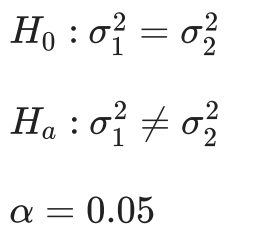

In [256]:
import    scipy.stats as    st
def    f_test(x, y, alt="two_sided"): 
    """
    Calculates the F-test.
    :param x: The first group of data 
    :param y: The second group of data
    :param alt: The alternative hypothesis, one of "two_sided" (default), "greater" or "less" 
    :return: a tuple with the F statistic value and the p-value.
    """
    df1 =    len(x) - 1
    df2 =    len(y) - 1
    f = x.var() / y.var() 
    if alt == "greater":
      p =    1.0 -    st.f.cdf(f, df1, df2) 
    elif    alt ==    "less":
      p =    st.f.cdf(f, df1, df2)
    else:
      # two-sided by default
      # Crawley, the R book, p.355
      p =    2.0*(1.0 -    st.f.cdf(f, df1, df2)) 
    return    f, p

In [257]:
tstat, pvalue =    f_test(dataframe['oil'], dataframe['gold']) 
print("test statistic:", tstat)
print("pvalue:        ", pvalue)

test statistic: 3.491057043846717
pvalue:         2.220446049250313e-16


In this case, the F-test resulted in a very low p-value (less than α), meaning that we do not believe the standard deviations are 
equal among the two samples. Referring back to the summary statistics of both samples, it can be seen that the standard 
deviation of oil is about twice that of gold
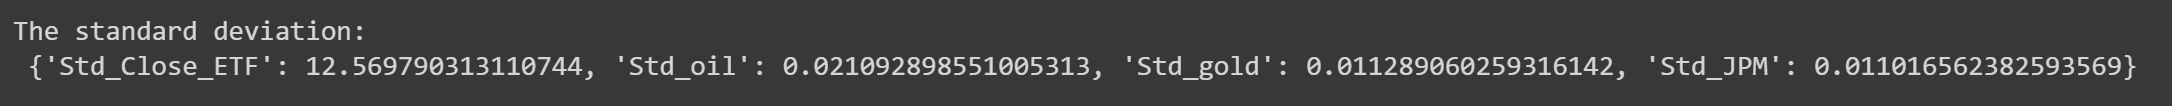

# **Part 8: Fitting the line to the data**

1. Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between them which can be observed from the 
scatter plot?


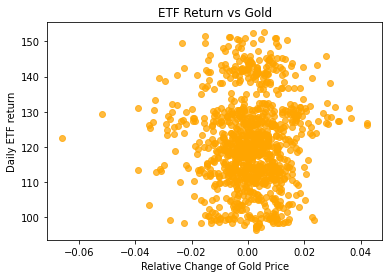

In [258]:
x =    'gold'
y =    'Close_ETF'
plt.scatter(data = dataframe, x = x, y = y, alpha=15/20, color='orange')
plt.title(f'ETF Return vs Gold')
plt.xlabel('Relative Change of Gold Price')
plt.ylabel('Daily ETF return')
plt.show()

2. Calculate the coefficient of correlation between ETF and Gold and interpret it.


In [259]:
dataframe[['Close_ETF', 'gold']].corr()


,Close_ETF,gold
Close_ETF,1.000000,0.022996
gold,0.022996,1.000000


The low correlation value represents that Gold and ETF prices have very small impact on the change of one to another.

3. Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line? 
How to interpret them?


In [260]:
np.random.seed(1234)

X = dataframe['gold']
#print(X)
X = sm.add_constant(X)
#print(X)
y = dataframe['Close_ETF']
#print(y)

In [261]:

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5280
Date:                Mon, 22 Aug 2022   Prob (F-statistic):              0.468
Time:                        03:48:14   Log-Likelihood:                -3949.5
No. Observations:                1000   AIC:                             7903.
Df Residuals:                     998   BIC:                             7913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1360      0.398    304.155      0.0

In [262]:
const, m = results.params[0], results.params[1]
print('intercept:', const)
print('slope :', m)


intercept: 121.13598849889824
slope : 25.604389324427302


The intercept and the slope is used to find the price of ETF relative to the change in price of Gold. The Intercept displays the point where price Gold and ETF are equal. The Slope is relative change in the price of ETF for 1.0 point change in the price of Gold.

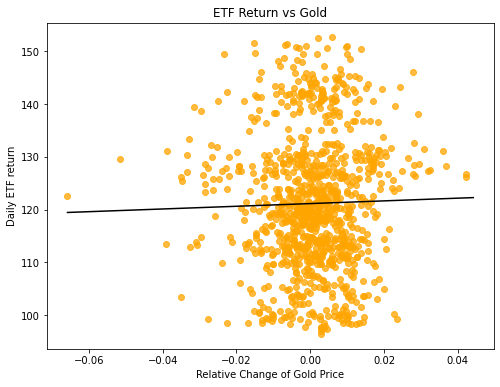

In [263]:

# Gold
plt.figure(figsize = (8,6))
x = dataframe['gold']
plt.plot(x, dataframe['Close_ETF'], 'o', alpha=15/20, color='orange');
plt.title(f'ETF Return vs Gold')
plt.xlabel('Relative Change of Gold Price')
plt.ylabel('Daily ETF return')
xx = np.arange(min(x), max(x)+.01, 0.01)
plt.plot(xx, const + m*xx,color='black')
plt.show()

4. Conduct a two-tailed t-test with H0 : β1 = 0. What is the P-value of the test? Is the linear relationship between ETF (Y) and 
Gold (X) significant at the significance level 0.01? Why or why not?


In [264]:
results.pvalues

const    0.000000
gold     0.467612
dtype: float64

The linear relationship between ETF and Gold is NOT significant at the 0.01 signficance level because the p-value = 0.467612 > 0.01.

5. Suppose that you use the coefficient of determination to assess the quality of this fitting. Is it a good model? Why or why 
not?


In [265]:
results.rsquared

0.0005287962431228532

The Coefficient of determination is very low. A coefficient closer to 1.0 indicates a reliable mode for future forecasts, while a value closer to 0 indicates that the caluclations fails to accurately model the data. Therefore our stats indicates bad quality of this model.

6. What are the assumptions you made for this model fitting?
    *   The linear regression model is “linear in parameters.”
    *   There is a random sampling of observations 
    *   The conditional mean should ben zero
    *   There is no multi-collinearity (or perfect collinearity)
    *   Spherical errors: There is homoscedasticity and no autocorrelation
    
7. Given the daily relative change in the gold price is 0.005127. Calculate the 99% confidence interval of the mean daily ETF 
return, and the 99% prediction interval of the individual daily ETF return.

In [266]:
new_data =    {'gold':[0.005127]}
X =    pd.DataFrame.from_dict(new_data)['gold'] 
type(X)
X =    dataframe['gold'].sample(n=1) 
print(X)
X =    sm.add_constant(X) 
print(X.shape) 
print(type(X))
print(new_data)

681   -0.022073
Name: gold, dtype: float64
(1, 1)
<class 'pandas.core.frame.DataFrame'>
{'gold': [0.005127]}


In [267]:
new_data =    {'gold':[0.005127, 0, -1]}
X =    pd.DataFrame.from_dict(new_data)['gold'] 
type(X)
print(X)
X =    sm.add_constant(X) 
print(X.shape) 
print(type(X))
print(new_data)
print(X)

0    0.005127
1    0.000000
2   -1.000000
Name: gold, dtype: float64
(3, 2)
<class 'pandas.core.frame.DataFrame'>
{'gold': [0.005127, 0, -1]}
   const      gold
0    1.0  0.005127
1    1.0  0.000000
2    1.0 -1.000000


In [268]:
predictions =    results.get_prediction(X)
(predictions.summary_frame(alpha=0.01)).loc[0,:]

mean             121.267262
mean_se            0.427572
mean_ci_lower    120.163800
mean_ci_upper    122.370725
obs_ci_lower      88.801169
obs_ci_upper     153.733355
Name: 0, dtype: float64

Slightly more intuitive way to do the same thing, but to me {matt} this is nicer!

In [269]:
X1 =  np.ones(1000) * 0.005127
y1 = dataframe['Close_ETF']
model = sm.OLS(y1, X1)
results1 = model.fit()

In [270]:
predictions = results1.get_prediction()
print("The 99% prediction interval of the individual daily ETF return is", predictions.conf_int(alpha=0.01)[0])
predictions.summary_frame(alpha=0.01)

The 99% prediction interval of the individual daily ETF return is [120.12712955 122.17879047]


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,121.15296,0.397492,120.12713,122.17879,88.697137,153.608783
1,121.15296,0.397492,120.12713,122.17879,88.697137,153.608783
2,121.15296,0.397492,120.12713,122.17879,88.697137,153.608783
3,121.15296,0.397492,120.12713,122.17879,88.697137,153.608783
4,121.15296,0.397492,120.12713,122.17879,88.697137,153.608783
...,...,...,...,...,...,...
995,121.15296,0.397492,120.12713,122.17879,88.697137,153.608783
996,121.15296,0.397492,120.12713,122.17879,88.697137,153.608783
997,121.15296,0.397492,120.12713,122.17879,88.697137,153.608783
998,121.15296,0.397492,120.12713,122.17879,88.697137,153.608783


# **Part 9: Does your model predict?**

**Based the results summary stats our model is not a good fit for prediction.** This is primarily due to the fact that there is no relationship between gold and close_etf, as seen in the correlation table above. Subjectively observing the scatterplot above, the linear regression line does not seem to fit the model well, any adjustment of the line would not fit the data well. This leads to a poor model, namely, close_etf is not a nice predictive variable for gold. If we wanted a better predictive model we could have explored polynomial linear regresion, but odds are with no pattern between variables, the model would also be inaccurate for predicitng gold. The best alternative for predicting gold would be to find a variable like oil that has a higher correlation and fit a model with a more correlated variable.

# **Part 10: Checking residuals and model selection**

In [271]:
dataframe.head()

,Close_ETF,oil,gold,JPM,diff_oil_gold
0,97.349998,0.039242,0.004668,0.032258,0.034574
1,97.750000,0.001953,-0.001366,-0.002948,0.003320
2,99.160004,-0.031514,-0.007937,0.025724,-0.023577
3,99.650002,0.034552,0.014621,0.011819,0.019931
4,99.260002,0.013619,-0.011419,0.000855,0.025038


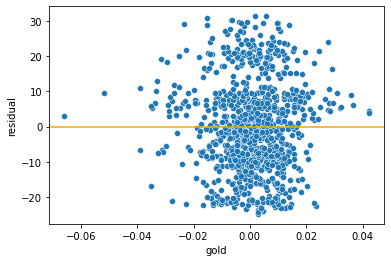

In [272]:
dataframe["predicted"] = results.predict()
dataframe["residual"] = results.resid

Predicted = results.predict(X) # There is only 2 values inside X... thats why only 2 predicted points!
Residual = results.resid


sns.scatterplot(data=dataframe, x=dataframe["gold"], y=dataframe["residual"])
plt.axhline(y=0, color= "orange")

In [273]:
dataframe.head(5)

,Close_ETF,oil,gold,JPM,diff_oil_gold,predicted,residual
0,97.349998,0.039242,0.004668,0.032258,0.034574,121.255504,-23.905506
1,97.750000,0.001953,-0.001366,-0.002948,0.003320,121.101000,-23.351000
2,99.160004,-0.031514,-0.007937,0.025724,-0.023577,120.932779,-21.772775
3,99.650002,0.034552,0.014621,0.011819,0.019931,121.510342,-21.860340
4,99.260002,0.013619,-0.011419,0.000855,0.025038,120.843606,-21.583604


In [274]:
dataframe["predicted"].min()

119.45109829094113

In [275]:
dataframe["predicted"].max()

122.21645829191425

Plotting the residual for the gold!

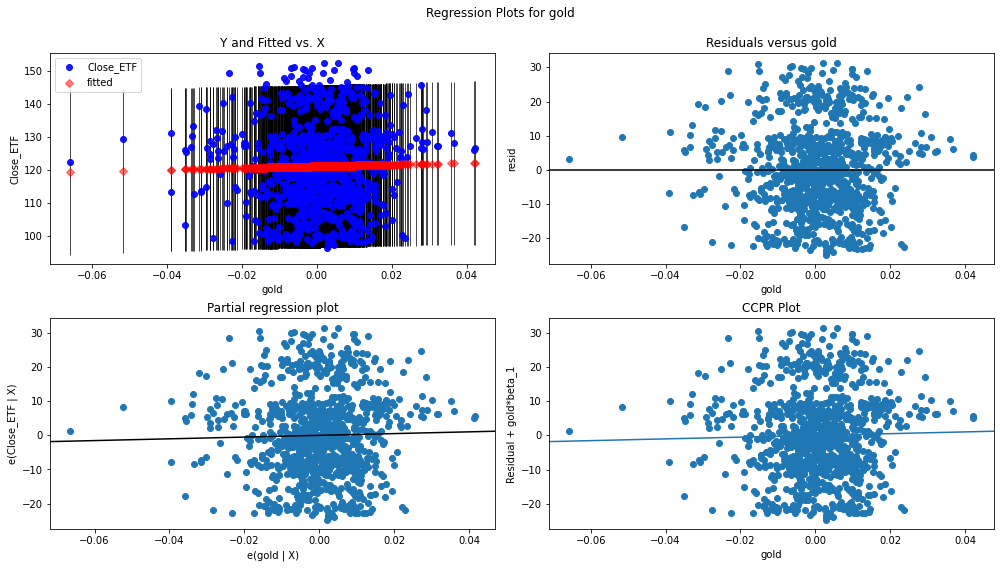

In [276]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(results,
                                    'gold',
                                    fig=fig)